In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from glob import glob
import joblib

In [88]:
%cd C:/Users/sdsd0/Desktop/scrappping(whoscored)/data
player_list = glob("new_Hitter/*.csv")
stats_list = [
        "Unnamed: 0",
        "year",
        "team",
        "age",
        "G",
        "PA",
        "AB",
        "R",
        "HIT",
        "HIT_2",
        "HIT_3",
        "HOME_RUN",
        "BASE",
        "RBI",
        "SB",
        "CS",
        "HBP",
        "IBB",
        "SO",
        "GDP",
        "SH",
        "SF",
        "AVG",
        "OBP",
        "SLG",
        "OPS",
        "wOBA",
        "wRC",
        "WAR",
        "Name",
    ]
df1 = pd.DataFrame(columns=stats_list)
df2 = pd.DataFrame(columns=stats_list)
df3 = pd.DataFrame(columns=stats_list)
df4 = pd.DataFrame(columns=stats_list)
def fill(stats):
    if stats==" ":
        return 0
    elif stats==0:
        return 0
    else:
        return float(stats)
def plus(year):
    return int(year+1)
def name_replace(name):
    name = name.replace('new_Hitter\\','')
    name = name.replace('.csv','')
    return name
for i in player_list:
    df = pd.read_csv(f"{i}")
    df["WAR"] = df["WAR"].apply(fill)
    if df["WAR"].sum()>20:
        continue
    if len(df)==1:
        name = name_replace(i)
        df["Name"] = name
        df1 = pd.concat([df1, df])
    if len(df)==2:
        name = name_replace(i)
        df["Name"] = name
        df2 = pd.concat([df2, df])
    if len(df)==3:
        name = name_replace(i)
        df["Name"] = name
        df3 = pd.concat([df3, df])
    if len(df)==4:
        name = name_replace(i)
        df["Name"] = name
        df4 = pd.concat([df4, df])
df1 = df1.drop(["Unnamed: 0"],axis=1)
df2 = df2.drop(["Unnamed: 0"],axis=1)
df3 = df3.drop(["Unnamed: 0"],axis=1)
df4 = df4.drop(["Unnamed: 0"],axis=1)
# df1 1년차
# df2 2년차
# df3 3년차
df1["year"] = df1["year"].apply(plus)
df2["year"] = df2["year"].apply(plus)
df3["year"] = df3["year"].apply(plus)
df4["year"] = df4["year"].apply(plus)

df_1 = df1[["WAR", "year","age"]]
df_2 = df2[["WAR", "year","age"]]
df_3 = df3[["WAR", "year","age"]]
df_4 = df4[["WAR", "Name", "year","age"]]

C:\Users\sdsd0\Desktop\scrappping(whoscored)\data


In [64]:
loaded_model_1 = joblib.load('model/train_num1_model.pkl')
loaded_model_2 = joblib.load('model/train_num2_model.pkl')
loaded_model_3 = joblib.load('model/train_num3_model.pkl')

In [65]:
num_1_predict = loaded_model_1.predict(df_1)
num_2_predict = loaded_model_2.predict(df_2)
#-------------------------------------------------------
def datasets(dataset, presure):
    data = list()
    ds_value = list(dataset.values)

    for i in range(0,len(dataset),presure):
        data.append(list(ds_value[i])+list(ds_value[i+1]))
    return np.array(data)
update_df3 = datasets(df_3, 3)
num_3_predict = loaded_model_3.predict(update_df3)

In [66]:
d = {"Name": df1["Name"].values,"WAR":num_1_predict, "year": [2]*len(df1)}
model_1_df = pd.DataFrame(d)
model_1_df = pd.concat([df1, model_1_df])
model_1_df = model_1_df[["WAR", "Name", "year", "age"]]
d = {"Name": df2["Name"].values,"WAR":num_2_predict, "year": [3, 4]*(len(df2)//2)}
model_2_df = pd.DataFrame(d)
model_2_df = pd.concat([df2, model_2_df])
model_2_df = model_2_df[["WAR", "Name", "year", "age"]]
d = {"Name": df3["Name"].unique(),"WAR":num_3_predict, "year": [4]*len(update_df3)}
model_3_df = pd.DataFrame(d)
model_3_df = pd.concat([df3, model_3_df])
model_3_df = model_3_df[["WAR", "Name", "year", "age"]]

model_1_df = model_1_df.sort_values(by=['Name','year'] ,ascending=True)
model_2_df = model_2_df.sort_values(by=['Name','year'] ,ascending=True)
model_3_df = model_3_df.sort_values(by=['Name','year'] ,ascending=True)

model_1_df = model_1_df.reset_index(drop=True)
model_2_df = model_2_df.reset_index(drop=True)
model_3_df = model_3_df.reset_index(drop=True)

In [67]:
# model_3_df[model_3_df["Name"]=="고명성"]
for i in range(len(model_1_df)):
    if pd.isna(model_1_df["age"][i]):
        model_1_df["age"][i] = model_1_df["age"][i-1]+1
    else:
        continue
        
for i in range(len(model_2_df)):
    if pd.isna(model_2_df["age"][i]):
        model_2_df["age"][i] = model_2_df["age"][i-1]+1
    else:
        continue

for i in range(len(model_3_df)):
    if pd.isna(model_3_df["age"][i]):
        model_3_df["age"][i] = model_3_df["age"][i-1]+1
    else:
        continue


<ipython-input-67-90c8b0710234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1_df["age"][i] = model_1_df["age"][i-1]+1
<ipython-input-67-90c8b0710234>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2_df["age"][i] = model_2_df["age"][i-1]+1
<ipython-input-67-90c8b0710234>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3_df["age"][i] = model_3_df["age"][i-1]+1


In [68]:
main_load_model = joblib.load('model/main_model.pkl')

In [73]:
# main_load_model()
model_1_df["WAR"].max()

1.7964089028991095

In [100]:
re_model_1_df = model_1_df[["WAR","year","age"]]
re_num_1_predict = loaded_model_2.predict(re_model_1_df)

d = {"Name": model_1_df["Name"].values,"WAR":re_num_1_predict, "year": [3, 4]*(len(model_1_df)//2)}
re_model_1_df = pd.DataFrame(d)
re_model_1_df = pd.concat([model_1_df, re_model_1_df])
re_model_1_df = re_model_1_df[["WAR", "Name", "year", "age"]]
re_model_1_df = re_model_1_df.sort_values(by=['Name','year'] ,ascending=True)
re_model_1_df = re_model_1_df.reset_index(drop=True)
for i in range(len(re_model_1_df)):
    if pd.isna(re_model_1_df["age"][i]):
        re_model_1_df["age"][i] = re_model_1_df["age"][i-1]+1
    else:
        continue

<ipython-input-100-effaac46ec43>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_model_1_df["age"][i] = re_model_1_df["age"][i-1]+1


In [113]:
new_hitter_df = pd.concat([model_2_df, model_3_df, re_model_1_df, df_4])
new_hitter_df = new_hitter_df.sort_values(by=['Name','year'] ,ascending=True)
new_hitter_df = new_hitter_df.reset_index(drop=True)
new_hitter = new_hitter_df[["WAR", "year","age"]]

main_predict = main_load_model.predict(new_hitter)

d = {"Name": new_hitter_df["Name"].values,"WAR":main_predict, "year": [5,6,7,8]*(len(new_hitter_df)//4)}
main_df = pd.DataFrame(d)
main_df = pd.concat([new_hitter_df, main_df])
main_df = main_df[["WAR", "Name", "year"]]
main_df = main_df.sort_values(by=['Name','year'] ,ascending=True)
main_df = main_df.reset_index(drop=True)

In [116]:
main_df[main_df["Name"]=="고명성"]

,WAR,Name,year
8,-0.050000,고명성,1
9,-0.170000,고명성,2
10,-0.010000,고명성,3
11,1.340867,고명성,4
12,2.744514,고명성,5
13,2.554481,고명성,6
14,2.395462,고명성,7
15,2.447528,고명성,8


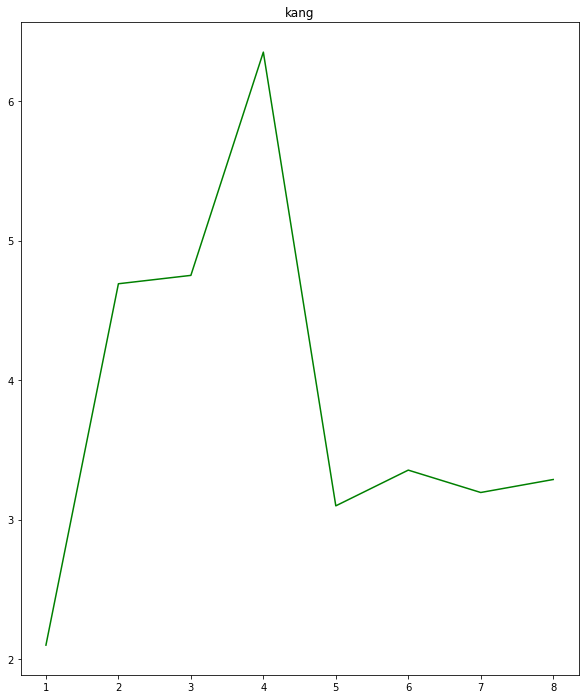

In [119]:
import matplotlib.pyplot as plt
x = main_df[main_df["Name"]=="강백호"]["year"]
y = main_df[main_df["Name"]=="강백호"]["WAR"]
plt.figure(figsize=(10, 12))
plt.title("kang")
plt.plot(x,y,c='green')
plt.show()

In [121]:
main_df.to_csv("predict_new_hitter.csv", index=False, encoding='utf-8')